<a href="https://colab.research.google.com/github/sajeeshen/WeatherAUS/blob/master/WeatherAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
warnings.filterwarnings("ignore")



In [280]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/weatherAUS.csv")

In [281]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Seems like we have lots of null values in different fields

In [282]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [283]:
# After dropping those fields checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### Target variable is RainTomorrow 

In [284]:
df['RainTomorrow'] = df['RainTomorrow'].replace(['Yes', 'No'], [1,0])

In [285]:
df.shape

(142193, 24)

In [286]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,0.224181
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,1.000000


In [287]:
df.reset_index(drop=True,inplace=True)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [289]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

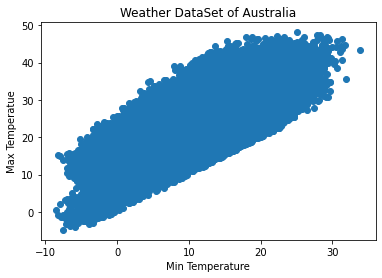

In [290]:
fix, ax = plt.subplots()
ax.scatter(df['MinTemp'], df['MaxTemp'])
ax.set_title('Weather DataSet of Australia')
ax.set_xlabel('Min Temperature')
ax.set_ylabel('Max Temperatue')
plt.show()

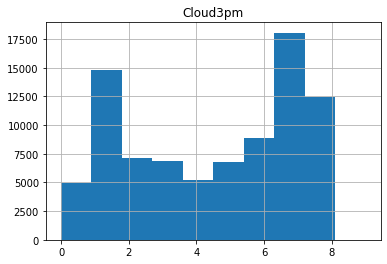

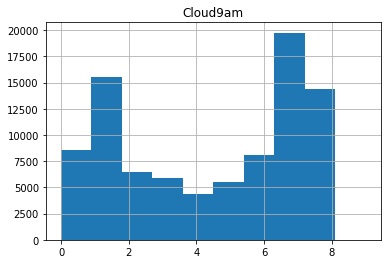

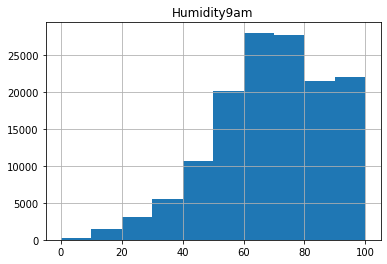

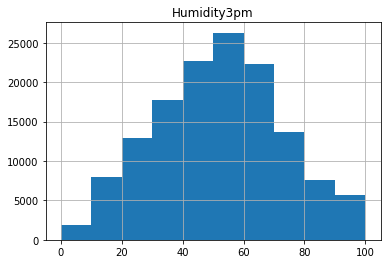

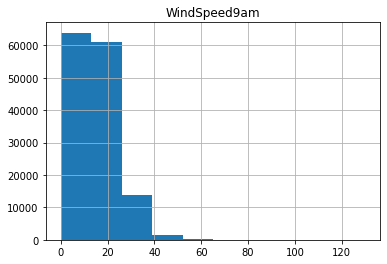

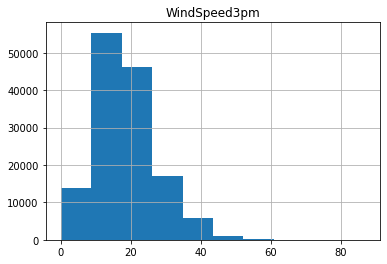

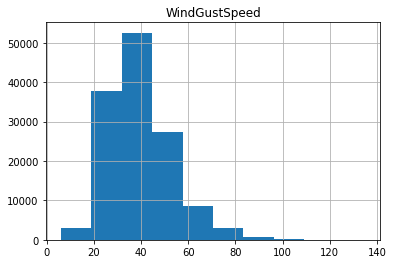

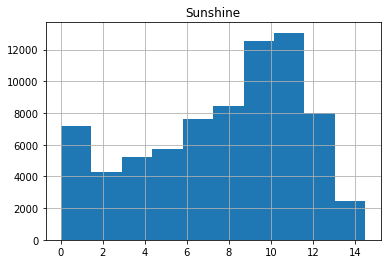

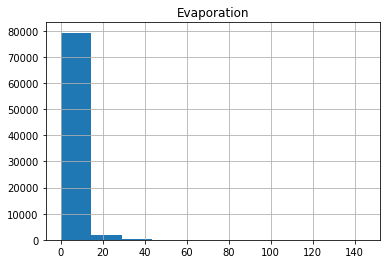

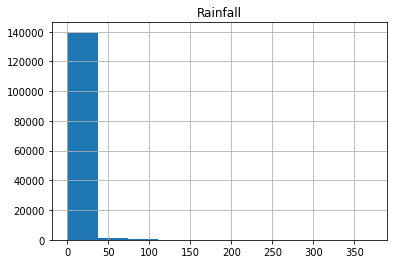

In [291]:
df.hist('Cloud3pm')
df.hist('Cloud9am')
df.hist('Humidity9am')
df.hist('Humidity3pm')
df.hist('WindSpeed9am')
df.hist('WindSpeed3pm')
df.hist('WindGustSpeed')
df.hist('Sunshine')
df.hist('Evaporation')
df.hist('Rainfall')
plt.show()

In [292]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743,0.083936
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208,-0.159237
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557,0.239032
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498,-0.119285
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973,-0.450768
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923,0.234010
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404,0.090995
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240,0.087817
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417,0.257161
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183,0.446160


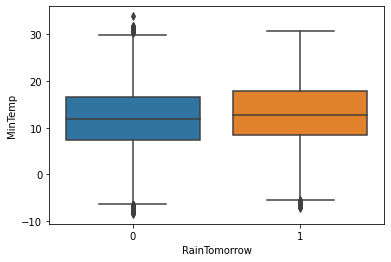

In [293]:
sns.boxplot(x = df["RainTomorrow"], y = df["MinTemp"])
plt.show()

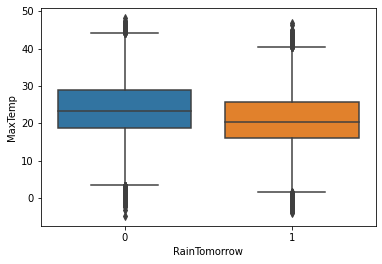

In [294]:
sns.boxplot(x = df["RainTomorrow"], y = df["MaxTemp"])
plt.show()

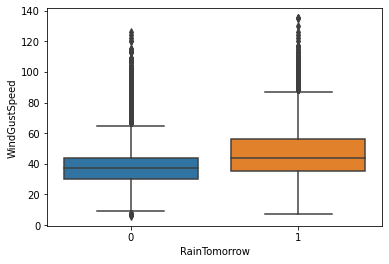

In [295]:
sns.boxplot(x = df["RainTomorrow"], y = df["WindGustSpeed"])
plt.show()

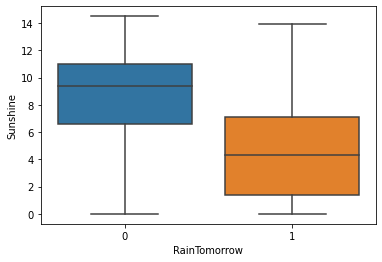

In [296]:
sns.boxplot(x = df["RainTomorrow"], y = df["Sunshine"])
plt.show()

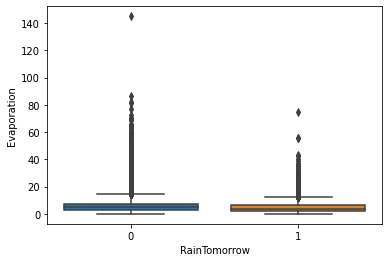

In [297]:
sns.boxplot(x = df["RainTomorrow"], y = df["Evaporation"])
plt.show()

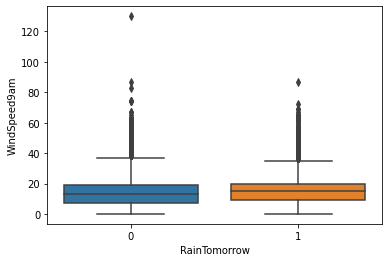

In [298]:
sns.boxplot(x = df["RainTomorrow"], y = df["WindSpeed9am"])
plt.show()

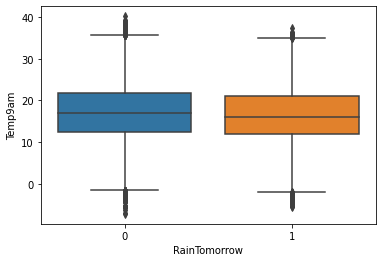

In [299]:
sns.boxplot(x = df["RainTomorrow"], y = df["Temp9am"])
plt.show()

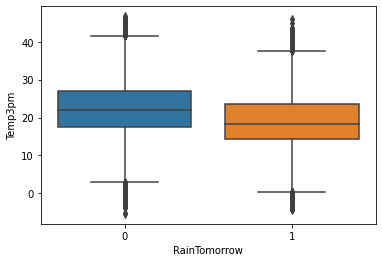

In [300]:
sns.boxplot(x = df["RainTomorrow"], y = df["Temp3pm"])
plt.show()

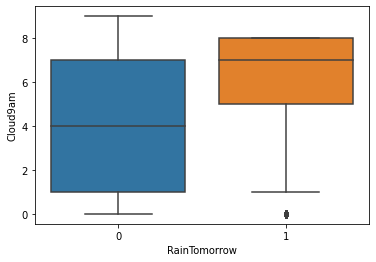

In [301]:
sns.boxplot(x = df["RainTomorrow"], y = df["Cloud9am"])
plt.show()

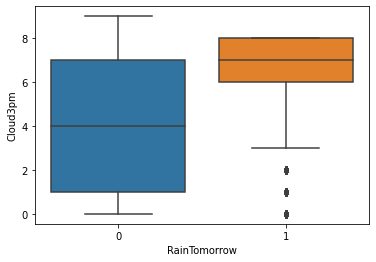

In [302]:
sns.boxplot(x = df["RainTomorrow"], y = df["Cloud3pm"])
plt.show()

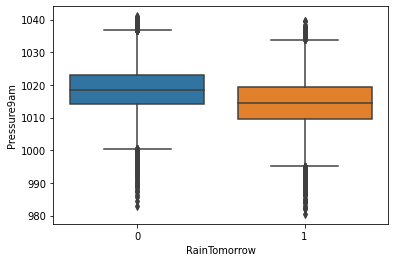

In [303]:
sns.boxplot(x = df["RainTomorrow"], y = df["Pressure9am"])
plt.show()

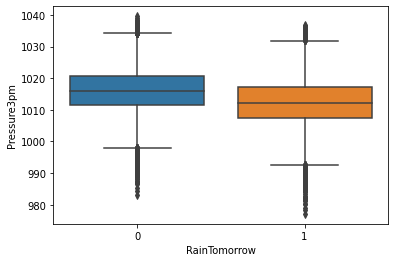

In [304]:
sns.boxplot(x = df["RainTomorrow"], y = df["Pressure3pm"])
plt.show()

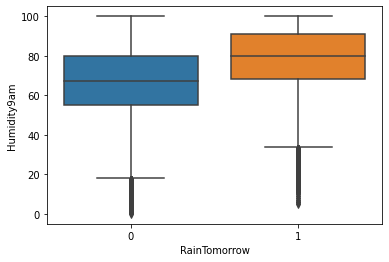

In [305]:
sns.boxplot(x = df["RainTomorrow"], y = df["Humidity9am"])
plt.show()

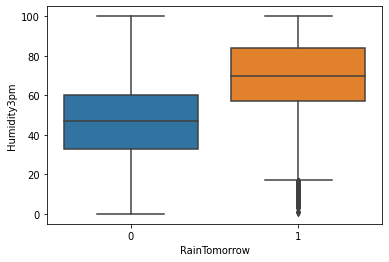

In [306]:
sns.boxplot(x = df["RainTomorrow"], y = df["Humidity3pm"])
plt.show()

In [307]:
df = df.drop(['Date','RISK_MM'], axis = 1)
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


In [308]:
df = df.dropna(subset = ['RainToday'])
df.fillna(0, inplace = True)
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


In [309]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [310]:
def set_directions(x):
    if x == 'NNW' or x == 'N' or x == 'NNE':
        return 'N'
    elif x == 'ENE' or x == 'E' or x =='ESE':
        return 'E'
    elif x == 'SSE' or x == 'S' or x == 'SSW':
        return 'S'
    elif x == 'WSW' or x == 'W' or x == 'WNW':
        return 'W'
    elif x == 'NE':
        return 'NE'
    elif x == 'SE':
        return 'SE'
    elif x == 'SW':
        return 'SW'
    elif x == 'NW':
        return 'NW'

In [311]:
df['WindGustDir'] = df["WindGustDir"].apply(set_directions)
df['WindDir9am'] = df['WindDir9am'].apply(set_directions)
df['WindDir3pm'] = df['WindDir3pm'].apply(set_directions)

In [312]:
df.WindDir3pm.unique()

array(['W', 'E', 'NW', 'S', 'N', 'SW', 'SE', None, 'NE'], dtype=object)

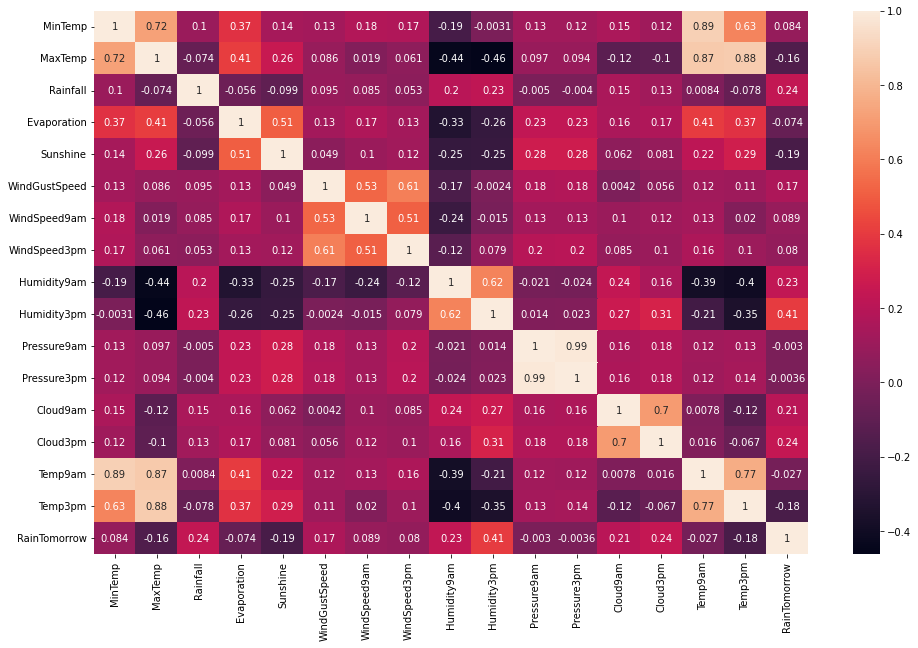

In [313]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), square=False, ax=ax, annot = True);

In [314]:
df = pd.get_dummies(df, columns = ['RainToday'])
df = pd.get_dummies(df, columns = ['WindDir3pm'])
df = pd.get_dummies(df, columns = ['WindDir9am', 'WindGustDir'])
df = pd.get_dummies(df, columns = ['Location'])

df['RainTomorrow'].value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 142192
Data columns (total 92 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MinTemp                    140787 non-null  float64
 1   MaxTemp                    140787 non-null  float64
 2   Rainfall                   140787 non-null  float64
 3   Evaporation                140787 non-null  float64
 4   Sunshine                   140787 non-null  float64
 5   WindGustSpeed              140787 non-null  float64
 6   WindSpeed9am               140787 non-null  float64
 7   WindSpeed3pm               140787 non-null  float64
 8   Humidity9am                140787 non-null  float64
 9   Humidity3pm                140787 non-null  float64
 10  Pressure9am                140787 non-null  float64
 11  Pressure3pm                140787 non-null  float64
 12  Cloud9am                   140787 non-null  float64
 13  Cloud3pm                   14

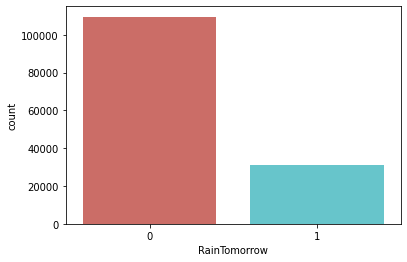

In [316]:
sns.countplot(x = 'RainTomorrow', data = df, palette = 'hls')
plt.show()

In [317]:
count_rainTomorrow = len(df[df['RainTomorrow'] == 1])
count_notRainTomorrow = len(df[df['RainTomorrow'] == 0])
percent_rainTomorrow = count_rainTomorrow / (count_rainTomorrow + count_notRainTomorrow)
percent_notRainTomorrow = count_notRainTomorrow / (count_rainTomorrow + count_notRainTomorrow)
print("Percentage of Rain Tomorrow:", percent_rainTomorrow*100)
print("Percentage of not Raining Tomorrow:", percent_notRainTomorrow*100)

Percentage of Rain Tomorrow: 22.161847329654016
Percentage of not Raining Tomorrow: 77.83815267034598


In [328]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df.RainTomorrow

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [329]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [320]:
Predictions = logit_model.predict(x_test)


In [321]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     32794
           1       0.68      0.40      0.50      9443

    accuracy                           0.82     42237
   macro avg       0.76      0.67      0.70     42237
weighted avg       0.81      0.82      0.81     42237



In [322]:
#Confusion Matrix
print(confusion_matrix(y_test, Predictions))

[[31029  1765]
 [ 5695  3748]]


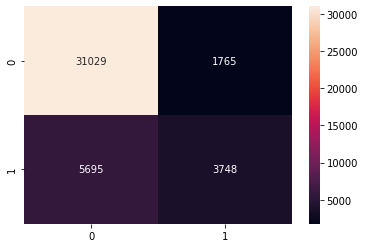

In [323]:
sns.heatmap(confusion_matrix(y_test, Predictions), annot=True, fmt="d")
plt.show()

In [324]:
TP = 31029
TN = 3748
FP = 1765
FN = 5095

#Accuracy
#Accuracy = (TP + TN)/Total

Accuracy = (TP + TN)/(TP+TN+FP+FN)

#Error Rate
#ErrorRate = (FP+FN)/Total

Error = (FP + FN)/(TP+TN+FP+FN)

print("Accuracy:", Accuracy*100)
print("Error:", Error*100)

Accuracy: 83.52426927972716
Error: 16.475730720272836


In [325]:
# Random forest

clf_rf = RandomForestClassifier(random_state=23)      
clr_rf = clf_rf.fit(x_train,y_train)

In [326]:
y_predict = clf_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_predict )
print('Accuracy: ', accuracy)

Accuracy:  0.8555295120392074


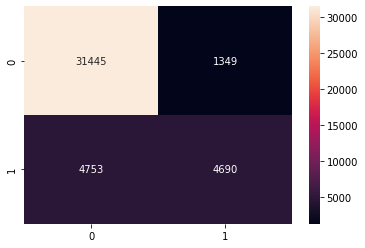

In [327]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="d")
plt.show()

In [330]:
TP = 31445
TN = 4690
FP = 1349
FN = 4753

#Accuracy
#Accuracy = (TP + TN)/Total

Accuracy = (TP + TN)/(TP+TN+FP+FN)

#Error Rate
#ErrorRate = (FP+FN)/Total

Error = (FP + FN)/(TP+TN+FP+FN)

print("Accuracy:", Accuracy*100)
print("Error:", Error*100)

Accuracy: 85.55295120392074
Error: 14.447048796079267
